In [1]:
!pip install imblearn

In [2]:
#import important liabrary
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
pd.pandas.set_option('display.max_columns', None)
import datetime
from imblearn.over_sampling import SMOTE

In [3]:
data=pd.read_csv(r"C:\Users\saurabh srivastava\Desktop\fliprobo projects\project 2\Micro Credit Project\Data file.csv")

In [4]:
data.head()

Unnamed: 0  label       msisdn    aon  daily_decr30  daily_decr90  \
0           1      0  21408I70789  272.0   3055.050000   3065.150000   
1           2      1  76462I70374  712.0  12122.000000  12124.750000   
2           3      1  17943I70372  535.0   1398.000000   1398.000000   
3           4      1  55773I70781  241.0     21.228000     21.228000   
4           5      1  03813I82730  947.0    150.619333    150.619333   

   rental30  rental90  last_rech_date_ma  last_rech_date_da  last_rech_amt_ma  \
0    220.13    260.13                2.0                0.0              1539   
1   3691.26   3691.26               20.0                0.0              5787   
2    900.13    900.13                3.0                0.0              1539   
3    159.42    159.42               41.0                0.0               947   
4   1098.90   1098.90                4.0                0.0              2309   

   cnt_ma_rech30  fr_ma_rech30  sumamnt_ma_rech30  medianamnt_ma_rech30  \
0              2          21.0             3078.0                1539.0   
1              1           0.0             5787.0                5787.0   
2              1           0.0             1539.0                1539.0   
3              0           0.0                0.0                   0.0   
4              7           2.0            20029.0                2309.0   

   medianmarechprebal30  cnt_ma_rech90  fr_ma_rech90  sumamnt_ma_rech90  \
0                  7.50              2            21               3078   
1                 61.04              1             0               5787   
2                 66.32              1             0               1539   
3                  0.00              1             0                947   
4                 29.00              8             2              23496   

   medianamnt_ma_rech90  medianmarechprebal90  cnt_da_rech30  fr_da_rech30  \
0                1539.0                  7.50            0.0           0.0   
1                5787.0                 61.04            0.0           0.0   
2                1539.0                 66.32            0.0           0.0   
3                 947.0                  2.50            0.0           0.0   
4                2888.0                 35.00            0.0           0.0   

   cnt_da_rech90  fr_da_rech90  cnt_loans30  amnt_loans30  maxamnt_loans30  \
0              0             0            2            12              6.0   
1              0             0            1            12             12.0   
2              0             0            1             6              6.0   
3              0             0            2            12              6.0   
4              0             0            7            42              6.0   

   medianamnt_loans30  cnt_loans90  amnt_loans90  maxamnt_loans90  \
0                 0.0          2.0            12                6   
1                 0.0          1.0            12               12   
2                 0.0          1.0             6                6   
3                 0.0          2.0            12                6   
4                 0.0          7.0            42                6   

   medianamnt_loans90  payback30  payback90 pcircle       pdate  
0                 0.0  29.000000  29.000000     UPW  2016-07-20  
1                 0.0   0.000000   0.000000     UPW  2016-08-10  
2                 0.0   0.000000   0.000000     UPW  2016-08-19  
3                 0.0   0.000000   0.000000     UPW  2016-06-06  
4                 0.0   2.333333   2.333333     UPW  2016-06-22

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209593 entries, 0 to 209592
Data columns (total 37 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Unnamed: 0            209593 non-null  int64  
 1   label                 209593 non-null  int64  
 2   msisdn                209593 non-null  object 
 3   aon                   209593 non-null  float64
 4   daily_decr30          209593 non-null  float64
 5   daily_decr90          209593 non-null  float64
 6   rental30              209593 non-null  float64
 7   rental90              209593 non-null  float64
 8   last_rech_date_ma     209593 non-null  float64
 9   last_rech_date_da     209593 non-null  float64
 10  last_rech_amt_ma      209593 non-null  int64  
 11  cnt_ma_rech30         209593 non-null  int64  
 12  fr_ma_rech30          209593 non-null  float64
 13  sumamnt_ma_rech30     209593 non-null  float64
 14  medianamnt_ma_rech30  209593 non-null  float64
 15  

In [6]:
data["pdate"] = pd.to_datetime(data["pdate"])

In [7]:
data.drop(columns=['Unnamed: 0'],axis=1,inplace=True)

In [8]:
data.head()

label       msisdn    aon  daily_decr30  daily_decr90  rental30  rental90  \
0      0  21408I70789  272.0   3055.050000   3065.150000    220.13    260.13   
1      1  76462I70374  712.0  12122.000000  12124.750000   3691.26   3691.26   
2      1  17943I70372  535.0   1398.000000   1398.000000    900.13    900.13   
3      1  55773I70781  241.0     21.228000     21.228000    159.42    159.42   
4      1  03813I82730  947.0    150.619333    150.619333   1098.90   1098.90   

   last_rech_date_ma  last_rech_date_da  last_rech_amt_ma  cnt_ma_rech30  \
0                2.0                0.0              1539              2   
1               20.0                0.0              5787              1   
2                3.0                0.0              1539              1   
3               41.0                0.0               947              0   
4                4.0                0.0              2309              7   

   fr_ma_rech30  sumamnt_ma_rech30  medianamnt_ma_rech30  \
0          21.0             3078.0                1539.0   
1           0.0             5787.0                5787.0   
2           0.0             1539.0                1539.0   
3           0.0                0.0                   0.0   
4           2.0            20029.0                2309.0   

   medianmarechprebal30  cnt_ma_rech90  fr_ma_rech90  sumamnt_ma_rech90  \
0                  7.50              2            21               3078   
1                 61.04              1             0               5787   
2                 66.32              1             0               1539   
3                  0.00              1             0                947   
4                 29.00              8             2              23496   

   medianamnt_ma_rech90  medianmarechprebal90  cnt_da_rech30  fr_da_rech30  \
0                1539.0                  7.50            0.0           0.0   
1                5787.0                 61.04            0.0           0.0   
2                1539.0                 66.32            0.0           0.0   
3                 947.0                  2.50            0.0           0.0   
4                2888.0                 35.00            0.0           0.0   

   cnt_da_rech90  fr_da_rech90  cnt_loans30  amnt_loans30  maxamnt_loans30  \
0              0             0            2            12              6.0   
1              0             0            1            12             12.0   
2              0             0            1             6              6.0   
3              0             0            2            12              6.0   
4              0             0            7            42              6.0   

   medianamnt_loans30  cnt_loans90  amnt_loans90  maxamnt_loans90  \
0                 0.0          2.0            12                6   
1                 0.0          1.0            12               12   
2                 0.0          1.0             6                6   
3                 0.0          2.0            12                6   
4                 0.0          7.0            42                6   

   medianamnt_loans90  payback30  payback90 pcircle      pdate  
0                 0.0  29.000000  29.000000     UPW 2016-07-20  
1                 0.0   0.000000   0.000000     UPW 2016-08-10  
2                 0.0   0.000000   0.000000     UPW 2016-08-19  
3                 0.0   0.000000   0.000000     UPW 2016-06-06  
4                 0.0   2.333333   2.333333     UPW 2016-06-22

In [9]:
for column in data.columns:
    if data[column].dtype==object:
        print(str(column)+ " : "+str(data[column].unique()))
        print(data[column].value_counts())
        print('-------------------------------------')

msisdn : ['21408I70789' '76462I70374' '17943I70372' ... '22758I85348' '59712I82733'
 '65061I85339']
04581I85330    7
47819I90840    7
30080I90588    6
87592I84456    6
29191I82738    6
              ..
09945I90587    1
81489I85349    1
22311I84456    1
86536I89230    1
87426I88689    1
Name: msisdn, Length: 186243, dtype: int64
-------------------------------------
pcircle : ['UPW']
UPW    209593
Name: pcircle, dtype: int64
-------------------------------------


In [10]:
mob=[]
for i in data['msisdn']:
    if 'I' in i:
        mob.append(i.replace("I",''))
print(mob)        

['2140870789', '7646270374', '1794370372', '5577370781', '0381382730', '3581970783', '9675984459', '0983290846', '5977284450', '5633170783', '3289382732', '8241790848', '1143589236', '6658097601', '6313970377', '2407589239', '8205385350', '3720484452', '4421790455', '1961190842', '6781390589', '7552270784', '6159095202', '9502790841', '5964582735', '5910270370', '4469290581', '4934590842', '6470385330', '1265888689', '7013090843', '3789190581', '7826085349', '7563088698', '5147870375', '4244982734', '4124982731', '0121090840', '1141890845', '2641170786', '2815082731', '8558070784', '6214984450', '2712395200', '8289585329', '0414090843', '2388490845', '3278390843', '0374691197', '5557082737', '9929370785', '0236791190', '0253484456', '0956170374', '5315270789', '9356790843', '6327770786', '2814670780', '8149684451', '0696998087', '4202390584', '6075489235', '8282889230', '0389488648', '3022082737', '6326891197', '7476970786', '4994989234', '8112790840', '9437382733', '3107782733', '8386

In [11]:
data['msisdn']=mob

In [12]:
data['msisdn']

0         2140870789
1         7646270374
2         1794370372
3         5577370781
4         0381382730
             ...    
209588    2275885348
209589    9558384455
209590    2855685350
209591    5971282733
209592    6506185339
Name: msisdn, Length: 209593, dtype: object

In [13]:
data['msisdn']=data['msisdn'].astype("int64")

In [14]:
data.describe()

label        msisdn            aon   daily_decr30  \
count  209593.000000  2.095930e+05  209593.000000  209593.000000   
mean        0.875177  4.974956e+09    8112.343445    5381.402289   
std         0.330519  2.890571e+09   75696.082531    9220.623400   
min         0.000000  4.827380e+05     -48.000000     -93.012667   
25%         1.000000  2.465991e+09     246.000000      42.440000   
50%         1.000000  4.905684e+09     527.000000    1469.175667   
75%         1.000000  7.503370e+09     982.000000    7244.000000   
max         1.000000  9.999895e+09  999860.755168  265926.000000   

        daily_decr90       rental30       rental90  last_rech_date_ma  \
count  209593.000000  209593.000000  209593.000000      209593.000000   
mean     6082.515068    2692.581910    3483.406534        3755.847800   
std     10918.812767    4308.586781    5770.461279       53905.892230   
min       -93.012667  -23737.140000  -24720.580000         -29.000000   
25%        42.692000     280.420000     300.260000           1.000000   
50%      1500.000000    1083.570000    1334.000000           3.000000   
75%      7802.790000    3356.940000    4201.790000           7.000000   
max    320630.000000  198926.110000  200148.110000      998650.377733   

       last_rech_date_da  last_rech_amt_ma  cnt_ma_rech30   fr_ma_rech30  \
count      209593.000000     209593.000000  209593.000000  209593.000000   
mean         3712.202921       2064.452797       3.978057    3737.355121   
std         53374.833430       2370.786034       4.256090   53643.625172   
min           -29.000000          0.000000       0.000000       0.000000   
25%             0.000000        770.000000       1.000000       0.000000   
50%             0.000000       1539.000000       3.000000       2.000000   
75%             0.000000       2309.000000       5.000000       6.000000   
max        999171.809410      55000.000000     203.000000  999606.368132   

       sumamnt_ma_rech30  medianamnt_ma_rech30  medianmarechprebal30  \
count      209593.000000         209593.000000         209593.000000   
mean         7704.501157           1812.817952           3851.927942   
std         10139.621714           2070.864620          54006.374433   
min             0.000000              0.000000           -200.000000   
25%          1540.000000            770.000000             11.000000   
50%          4628.000000           1539.000000             33.900000   
75%         10010.000000           1924.000000             83.000000   
max        810096.000000          55000.000000         999479.419319   

       cnt_ma_rech90   fr_ma_rech90  sumamnt_ma_rech90  medianamnt_ma_rech90  \
count   209593.00000  209593.000000      209593.000000         209593.000000   
mean         6.31543       7.716780       12396.218352           1864.595821   
std          7.19347      12.590251       16857.793882           2081.680664   
min          0.00000       0.000000           0.000000              0.000000   
25%          2.00000       0.000000        2317.000000            773.000000   
50%          4.00000       2.000000        7226.000000           1539.000000   
75%          8.00000       8.000000       16000.000000           1924.000000   
max        336.00000      88.000000      953036.000000          55000.000000   

       medianmarechprebal90  cnt_da_rech30   fr_da_rech30  cnt_da_rech90  \
count         209593.000000  209593.000000  209593.000000  209593.000000   
mean              92.025541     262.578110    3749.494447       0.041495   
std              369.215658    4183.897978   53885.414979       0.397556   
min             -200.000000       0.000000       0.000000       0.000000   
25%               14.600000       0.000000       0.000000       0.000000   
50%               36.000000       0.000000       0.000000       0.000000   
75%               79.310000       0.000000       0.000000       0.000000   
max            41456.500000   99914.441420  999809.240107      38.000000   

    

In [15]:
data.shape

(209593, 36)

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209593 entries, 0 to 209592
Data columns (total 36 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   label                 209593 non-null  int64         
 1   msisdn                209593 non-null  int64         
 2   aon                   209593 non-null  float64       
 3   daily_decr30          209593 non-null  float64       
 4   daily_decr90          209593 non-null  float64       
 5   rental30              209593 non-null  float64       
 6   rental90              209593 non-null  float64       
 7   last_rech_date_ma     209593 non-null  float64       
 8   last_rech_date_da     209593 non-null  float64       
 9   last_rech_amt_ma      209593 non-null  int64         
 10  cnt_ma_rech30         209593 non-null  int64         
 11  fr_ma_rech30          209593 non-null  float64       
 12  sumamnt_ma_rech30     209593 non-null  float64       
 13 

In [17]:
data['pcircle']=data['pcircle'].replace('UPW',0)

In [18]:
data['pcircle']

0         0
1         0
2         0
3         0
4         0
         ..
209588    0
209589    0
209590    0
209591    0
209592    0
Name: pcircle, Length: 209593, dtype: int64

In [19]:
m=len(data['msisdn'].unique())

In [20]:
df=data.copy()
df.drop(columns=['pdate'],axis=1,inplace=True)

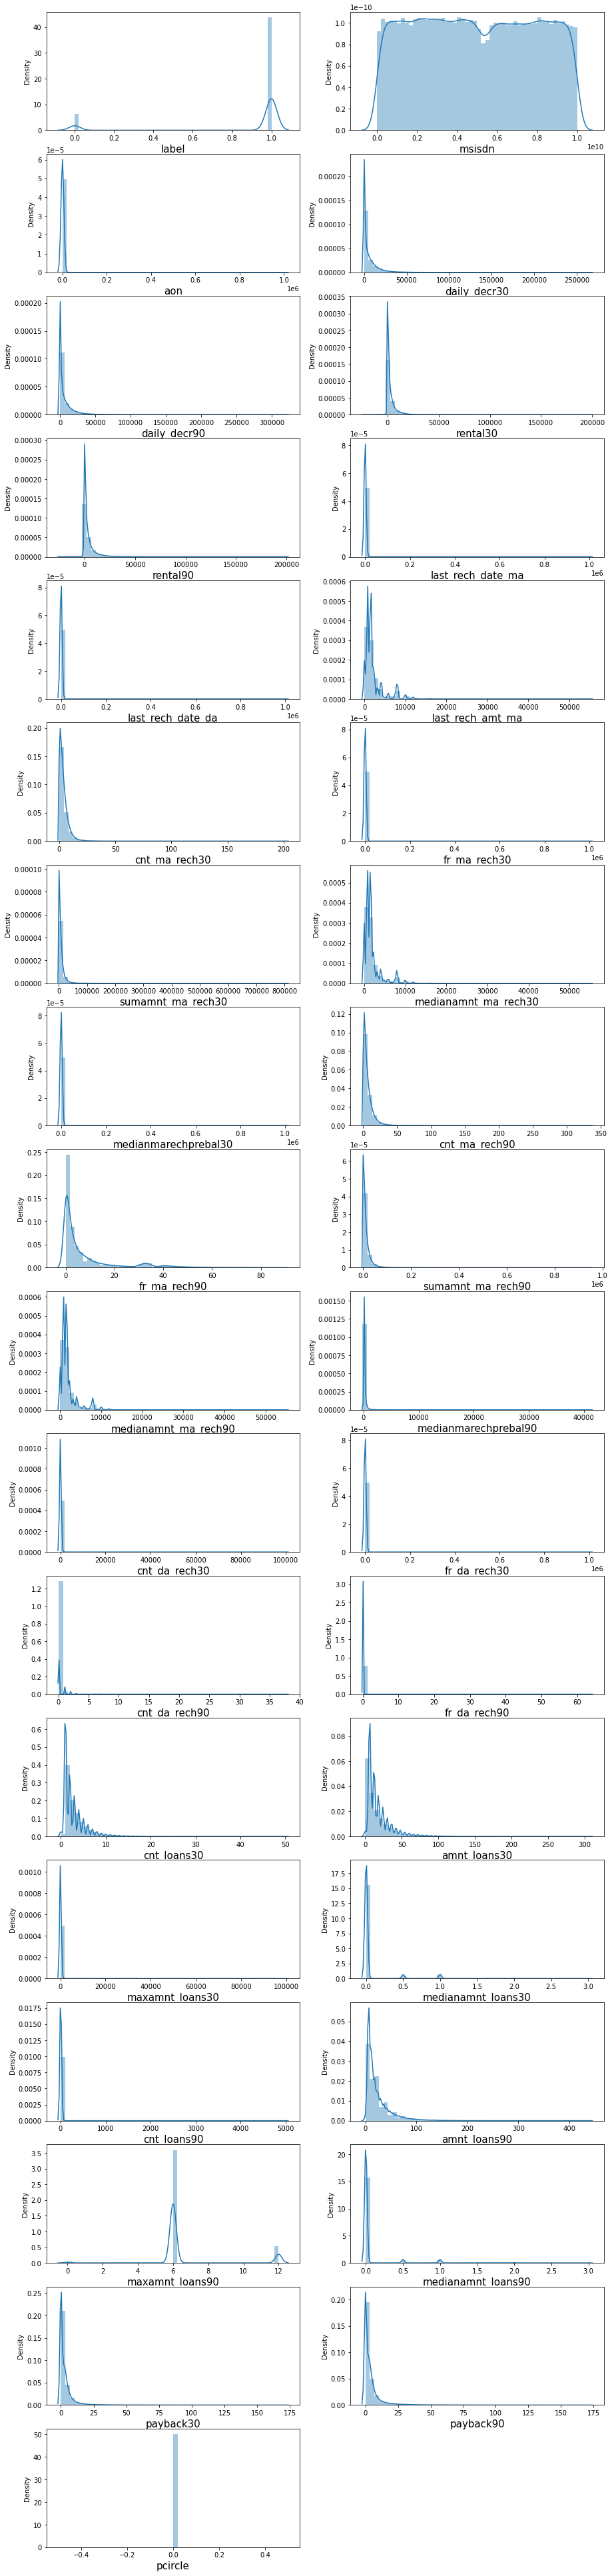

In [21]:
plt.figure(figsize=(15,70))
graph=1
for column in df:
    if graph<=37:
        ax=plt.subplot(18,2,graph)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=15)
    graph+=1
plt.show()

In [22]:
from sklearn.preprocessing import MinMaxScaler

In [23]:
scaler=MinMaxScaler()

In [24]:
x_scaled=scaler.fit_transform(df)

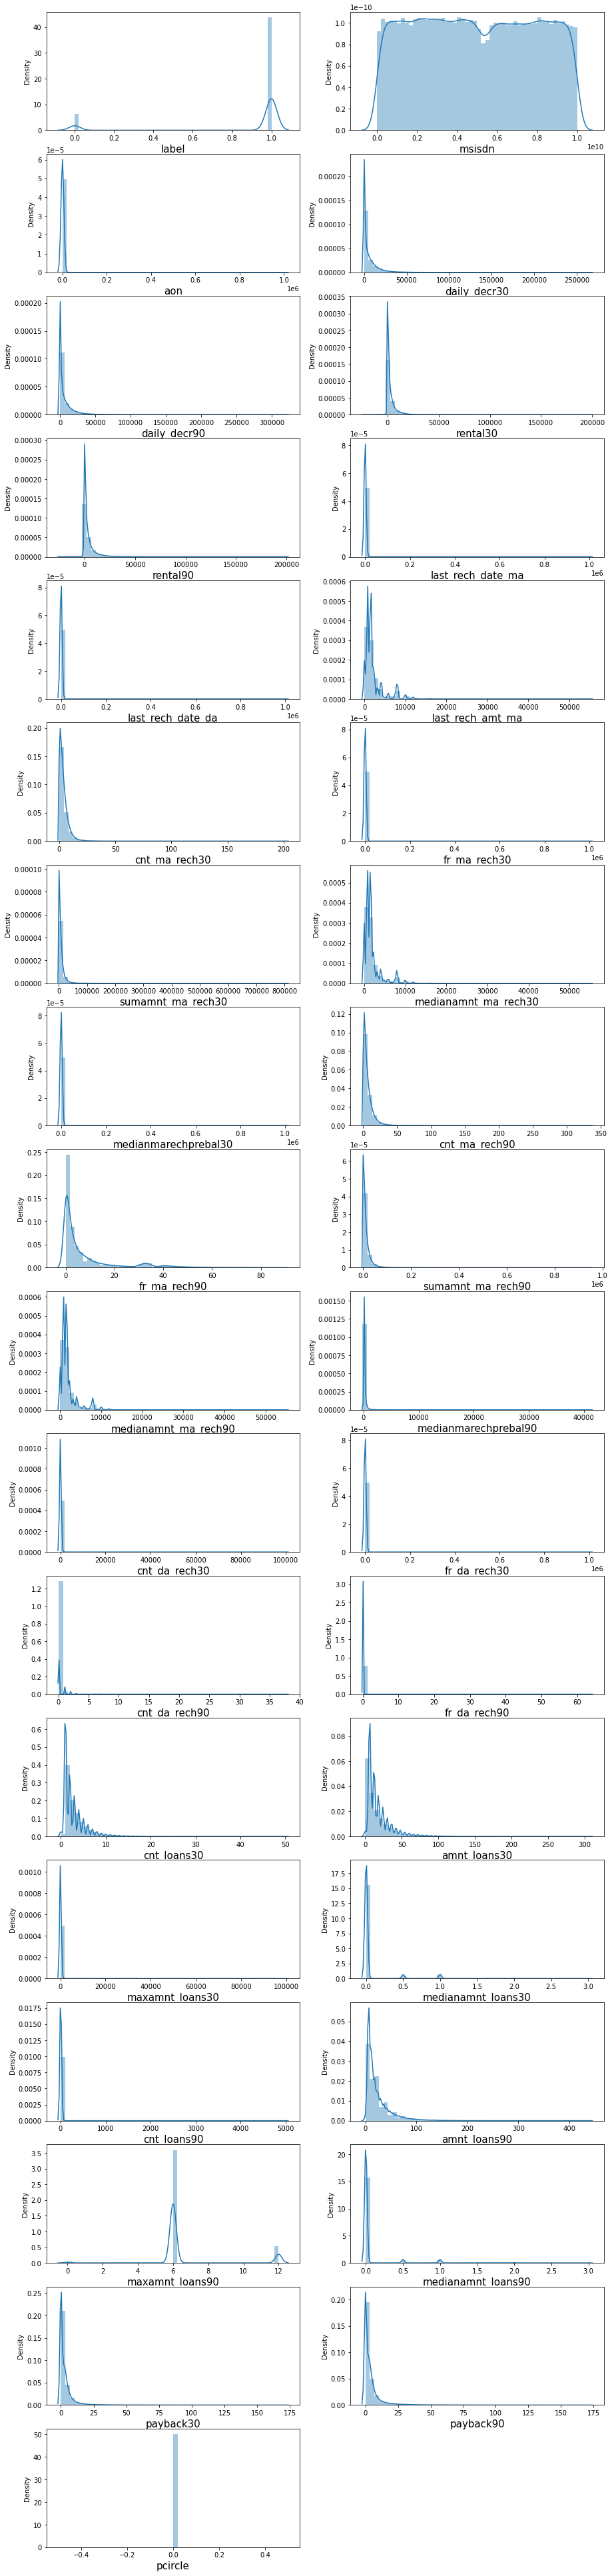

In [25]:
plt.figure(figsize=(15,70))
graph=1
for column in df:
    if graph<=37:
        ax=plt.subplot(18,2,graph)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=15)
    graph+=1
plt.show()

In [26]:
df.skew()

label                   -2.270254
msisdn                   0.018124
aon                     10.392949
daily_decr30             3.946230
daily_decr90             4.252565
rental30                 4.521929
rental90                 4.437681
last_rech_date_ma       14.790974
last_rech_date_da       14.814857
last_rech_amt_ma         3.781149
cnt_ma_rech30            3.283842
fr_ma_rech30            14.772833
sumamnt_ma_rech30        6.386787
medianamnt_ma_rech30     3.512324
medianmarechprebal30    14.779875
cnt_ma_rech90            3.425254
fr_ma_rech90             2.285423
sumamnt_ma_rech90        4.897950
medianamnt_ma_rech90     3.752706
medianmarechprebal90    44.880503
cnt_da_rech30           17.818364
fr_da_rech30            14.776430
cnt_da_rech90           27.267278
fr_da_rech90            28.988083
cnt_loans30              2.713421
amnt_loans30             2.975719
maxamnt_loans30         17.658052
medianamnt_loans30       4.551043
cnt_loans90             16.594408
amnt_loans90  

In [27]:
q1=df['aon'].quantile(0.25)
q3=df['aon'].quantile(0.75)
iqr=q3-q1
lower_limit=q1-1.5*iqr
upper_limit=q3+1.5*iqr

In [28]:
df['aon']=np.where(df['aon']>upper_limit,upper_limit,
                        np.where(df['aon']<lower_limit,lower_limit,
                        df['aon']))

In [29]:
q1=df['daily_decr30'].quantile(0.25)
q3=df['daily_decr30'].quantile(0.75)
iqr=q3-q1
lower_limit=q1-1.5*iqr
upper_limit=q3+1.5*iqr

In [30]:
df['daily_decr30']=np.where(df['daily_decr30']>upper_limit,upper_limit,
                        np.where(df['daily_decr30']<lower_limit,lower_limit,
                        df['daily_decr30']))

In [31]:
q1=df['daily_decr90'].quantile(0.25)
q3=df['daily_decr90'].quantile(0.75)
iqr=q3-q1
lower_limit=q1-1.5*iqr
upper_limit=q3+1.5*iqr

In [32]:
df['daily_decr90']=np.where(df['daily_decr90']>upper_limit,upper_limit,
                        np.where(df['daily_decr90']<lower_limit,lower_limit,
                        df['daily_decr90']))

In [33]:
q1=df['rental30'].quantile(0.25)
q3=df['rental30'].quantile(0.75)
iqr=q3-q1
lower_limit=q1-1.5*iqr
upper_limit=q3+1.5*iqr

In [34]:
df['rental30']=np.where(df['rental30']>upper_limit,upper_limit,
                        np.where(df['rental30']<lower_limit,lower_limit,
                        df['rental30']))

In [35]:
q1=df['rental90'].quantile(0.25)
q3=df['rental90'].quantile(0.75)
iqr=q3-q1
lower_limit=q1-1.5*iqr
upper_limit=q3+1.5*iqr

In [36]:
df['rental90']=np.where(df['rental90']>upper_limit,upper_limit,
                        np.where(df['rental90']<lower_limit,lower_limit,
                        df['rental90']))

In [37]:
q1=df['last_rech_date_ma'].quantile(0.25)
q3=df['last_rech_date_ma'].quantile(0.75)
iqr=q3-q1
lower_limit=q1-1.5*iqr
upper_limit=q3+1.5*iqr

In [38]:
df['last_rech_date_ma']=np.where(df['last_rech_date_ma']>upper_limit,upper_limit,
                        np.where(df['last_rech_date_ma']<lower_limit,lower_limit,
                        df['last_rech_date_ma']))

In [39]:
q1=df['last_rech_date_da'].quantile(0.25)
q3=df['last_rech_date_da'].quantile(0.75)
iqr=q3-q1
lower_limit=q1-1.5*iqr
upper_limit=q3+1.5*iqr

In [40]:
df['last_rech_date_da']=np.where(df['last_rech_date_da']>upper_limit,upper_limit,
                        np.where(df['last_rech_date_da']<lower_limit,lower_limit,
                        df['last_rech_date_da']))

In [41]:
q1=df['last_rech_amt_ma'].quantile(0.25)
q3=df['last_rech_amt_ma'].quantile(0.75)
iqr=q3-q1
lower_limit=q1-1.5*iqr
upper_limit=q3+1.5*iqr

In [42]:
df['last_rech_amt_ma']=np.where(df['last_rech_amt_ma']>upper_limit,upper_limit,
                        np.where(df['last_rech_amt_ma']<lower_limit,lower_limit,
                        df['last_rech_amt_ma']))

In [43]:
q1=df['cnt_ma_rech30'].quantile(0.25)
q3=df['cnt_ma_rech30'].quantile(0.75)
iqr=q3-q1
lower_limit=q1-1.5*iqr
upper_limit=q3+1.5*iqr

In [44]:
df['cnt_ma_rech30']=np.where(df['cnt_ma_rech30']>upper_limit,upper_limit,
                        np.where(df['cnt_ma_rech30']<lower_limit,lower_limit,
                        df['cnt_ma_rech30']))

In [45]:
q1=df['fr_ma_rech30'].quantile(0.25)
q3=df['fr_ma_rech30'].quantile(0.75)
iqr=q3-q1
lower_limit=q1-1.5*iqr
upper_limit=q3+1.5*iqr

In [46]:
df['fr_ma_rech30']=np.where(df['fr_ma_rech30']>upper_limit,upper_limit,
                        np.where(df['fr_ma_rech30']<lower_limit,lower_limit,
                        df['fr_ma_rech30']))

In [47]:
q1=df['sumamnt_ma_rech30'].quantile(0.25)
q3=df['sumamnt_ma_rech30'].quantile(0.75)
iqr=q3-q1
lower_limit=q1-1.5*iqr
upper_limit=q3+1.5*iqr

In [48]:
df['sumamnt_ma_rech30']=np.where(df['sumamnt_ma_rech30']>upper_limit,upper_limit,
                        np.where(df['sumamnt_ma_rech30']<lower_limit,lower_limit,
                        df['sumamnt_ma_rech30']))

In [49]:
q1=df['medianamnt_ma_rech30'].quantile(0.25)
q3=df['medianamnt_ma_rech30'].quantile(0.75)
iqr=q3-q1
lower_limit=q1-1.5*iqr
upper_limit=q3+1.5*iqr

In [50]:
df['medianamnt_ma_rech30']=np.where(df['medianamnt_ma_rech30']>upper_limit,upper_limit,
                        np.where(df['medianamnt_ma_rech30']<lower_limit,lower_limit,
                        df['medianamnt_ma_rech30']))

In [51]:
q1=df['medianmarechprebal30'].quantile(0.25)
q3=df['medianmarechprebal30'].quantile(0.75)
iqr=q3-q1
lower_limit=q1-1.5*iqr
upper_limit=q3+1.5*iqr

In [52]:
df['medianmarechprebal30']=np.where(df['medianmarechprebal30']>upper_limit,upper_limit,
                        np.where(df['medianmarechprebal30']<lower_limit,lower_limit,
                        df['medianmarechprebal30']))

In [53]:
q1=df['cnt_ma_rech90'].quantile(0.25)
q3=df['cnt_ma_rech90'].quantile(0.75)
iqr=q3-q1
lower_limit=q1-1.5*iqr
upper_limit=q3+1.5*iqr

In [54]:
df['cnt_ma_rech90']=np.where(df['cnt_ma_rech90']>upper_limit,upper_limit,
                        np.where(df['cnt_ma_rech90']<lower_limit,lower_limit,
                        df['cnt_ma_rech90']))

In [55]:
q1=df['fr_ma_rech90'].quantile(0.25)
q3=df['fr_ma_rech90'].quantile(0.75)
iqr=q3-q1
lower_limit=q1-1.5*iqr
upper_limit=q3+1.5*iqr

In [56]:
df['fr_ma_rech90']=np.where(df['fr_ma_rech90']>upper_limit,upper_limit,
                        np.where(df['fr_ma_rech90']<lower_limit,lower_limit,
                        df['fr_ma_rech90']))

In [57]:
q1=df['sumamnt_ma_rech90'].quantile(0.25)
q3=df['sumamnt_ma_rech90'].quantile(0.75)
iqr=q3-q1
lower_limit=q1-1.5*iqr
upper_limit=q3+1.5*iqr

In [58]:
df['sumamnt_ma_rech90']=np.where(df['sumamnt_ma_rech90']>upper_limit,upper_limit,
                        np.where(df['sumamnt_ma_rech90']<lower_limit,lower_limit,
                        df['sumamnt_ma_rech90']))

In [59]:
q1=df['medianamnt_ma_rech90'].quantile(0.25)
q3=df['medianamnt_ma_rech90'].quantile(0.75)
iqr=q3-q1
lower_limit=q1-1.5*iqr
upper_limit=q3+1.5*iqr

In [60]:
df['medianamnt_ma_rech90']=np.where(df['medianamnt_ma_rech90']>upper_limit,upper_limit,
                        np.where(df['medianamnt_ma_rech90']<lower_limit,lower_limit,
                        df['medianamnt_ma_rech90']))

In [61]:
q1=df['medianmarechprebal90'].quantile(0.25)
q3=df['medianmarechprebal90'].quantile(0.75)
iqr=q3-q1
lower_limit=q1-1.5*iqr
upper_limit=q3+1.5*iqr

In [62]:
df['medianmarechprebal90']=np.where(df['medianmarechprebal90']>upper_limit,upper_limit,
                        np.where(df['medianmarechprebal90']<lower_limit,lower_limit,
                        df['medianmarechprebal90']))

In [63]:
q1=df['cnt_da_rech30'].quantile(0.25)
q3=df['cnt_da_rech30'].quantile(0.75)
iqr=q3-q1
lower_limit=q1-1.5*iqr
upper_limit=q3+1.5*iqr

In [64]:
df['cnt_da_rech30']=np.where(df['cnt_da_rech30']>upper_limit,upper_limit,
                        np.where(df['cnt_da_rech30']<lower_limit,lower_limit,
                        df['cnt_da_rech30']))

In [65]:
q1=df['fr_da_rech30'].quantile(0.25)
q3=df['fr_da_rech30'].quantile(0.75)
iqr=q3-q1
lower_limit=q1-1.5*iqr
upper_limit=q3+1.5*iqr

In [66]:
df['fr_da_rech30']=np.where(df['fr_da_rech30']>upper_limit,upper_limit,
                        np.where(df['fr_da_rech30']<lower_limit,lower_limit,
                        df['fr_da_rech30']))

In [67]:
q1=df['cnt_da_rech90'].quantile(0.25)
q3=df['cnt_da_rech90'].quantile(0.75)
iqr=q3-q1
lower_limit=q1-1.5*iqr
upper_limit=q3+1.5*iqr

In [68]:
df['cnt_da_rech90']=np.where(df['cnt_da_rech90']>upper_limit,upper_limit,
                        np.where(df['cnt_da_rech90']<lower_limit,lower_limit,
                        df['cnt_da_rech90']))

In [69]:
q1=df['fr_da_rech90'].quantile(0.25)
q3=df['fr_da_rech90'].quantile(0.75)
iqr=q3-q1
lower_limit=q1-1.5*iqr
upper_limit=q3+1.5*iqr

In [70]:
df['fr_da_rech90']=np.where(df['fr_da_rech90']>upper_limit,upper_limit,
                        np.where(df['fr_da_rech90']<lower_limit,lower_limit,
                        df['fr_da_rech90']))

In [71]:
q1=df['cnt_loans30'].quantile(0.25)
q3=df['cnt_loans30'].quantile(0.75)
iqr=q3-q1
lower_limit=q1-1.5*iqr
upper_limit=q3+1.5*iqr

In [72]:
df['cnt_loans30']=np.where(df['cnt_loans30']>upper_limit,upper_limit,
                        np.where(df['cnt_loans30']<lower_limit,lower_limit,
                        df['cnt_loans30']))

In [73]:
q1=df['amnt_loans30'].quantile(0.25)
q3=df['amnt_loans30'].quantile(0.75)
iqr=q3-q1
lower_limit=q1-1.5*iqr
upper_limit=q3+1.5*iqr

In [74]:
df['amnt_loans30']=np.where(df['amnt_loans30']>upper_limit,upper_limit,
                        np.where(df['amnt_loans30']<lower_limit,lower_limit,
                        df['amnt_loans30']))

In [75]:
q1=df['medianamnt_loans90'].quantile(0.25)
q3=df['medianamnt_loans90'].quantile(0.75)
iqr=q3-q1
lower_limit=q1-1.5*iqr
upper_limit=q3+1.5*iqr

In [76]:
df['medianamnt_loans90']=np.where(df['medianamnt_loans90']>upper_limit,upper_limit,
                        np.where(df['medianamnt_loans90']<lower_limit,lower_limit,
                        df['medianamnt_loans90']))

In [77]:
q1=df['payback30'].quantile(0.25)
q3=df['payback30'].quantile(0.75)
iqr=q3-q1
lower_limit=q1-1.5*iqr
upper_limit=q3+1.5*iqr

In [78]:
df['payback30']=np.where(df['payback30']>upper_limit,upper_limit,
                        np.where(df['payback30']<lower_limit,lower_limit,
                        df['payback30']))

In [79]:
q1=df['payback90'].quantile(0.25)
q3=df['payback90'].quantile(0.75)
iqr=q3-q1
lower_limit=q1-1.5*iqr
upper_limit=q3+1.5*iqr

In [80]:
df['payback90']=np.where(df['payback90']>upper_limit,upper_limit,
                        np.where(df['payback90']<lower_limit,lower_limit,
                        df['payback90']))

In [81]:
q1=df['maxamnt_loans30'].quantile(0.25)
q3=df['maxamnt_loans30'].quantile(0.75)
iqr=q3-q1
lower_limit=q1-1.5*iqr
upper_limit=q3+1.5*iqr

In [82]:
df['maxamnt_loans30']=np.where(df['maxamnt_loans30']>upper_limit,upper_limit,
                        np.where(df['maxamnt_loans30']<lower_limit,lower_limit,
                        df['maxamnt_loans30']))

In [83]:
q1=df['medianamnt_loans30'].quantile(0.25)
q3=df['medianamnt_loans30'].quantile(0.75)
iqr=q3-q1
lower_limit=q1-1.5*iqr
upper_limit=q3+1.5*iqr

In [84]:
df['medianamnt_loans30']=np.where(df['medianamnt_loans30']>upper_limit,upper_limit,
                        np.where(df['medianamnt_loans30']<lower_limit,lower_limit,
                        df['medianamnt_loans30']))

In [85]:
q1=df['cnt_loans90'].quantile(0.25)
q3=df['cnt_loans90'].quantile(0.75)
iqr=q3-q1
lower_limit=q1-1.5*iqr
upper_limit=q3+1.5*iqr

In [86]:
df['cnt_loans90']=np.where(df['cnt_loans90']>upper_limit,upper_limit,
                        np.where(df['cnt_loans90']<lower_limit,lower_limit,
                        df['cnt_loans90']))

In [87]:
q1=df['amnt_loans90'].quantile(0.25)
q3=df['amnt_loans90'].quantile(0.75)
iqr=q3-q1
lower_limit=q1-1.5*iqr
upper_limit=q3+1.5*iqr

In [88]:
df['amnt_loans90']=np.where(df['amnt_loans90']>upper_limit,upper_limit,
                        np.where(df['amnt_loans90']<lower_limit,lower_limit,
                        df['amnt_loans90']))

In [89]:
df.skew()

label                  -2.270254
msisdn                  0.018124
aon                     0.947127
daily_decr30            1.239231
daily_decr90            1.238995
rental30                1.192510
rental90                1.193291
last_rech_date_ma       1.040301
last_rech_date_da       0.000000
last_rech_amt_ma        1.003446
cnt_ma_rech30           0.904157
fr_ma_rech30            1.253282
sumamnt_ma_rech30       1.080771
medianamnt_ma_rech30    0.728219
medianmarechprebal30    0.988628
cnt_ma_rech90           0.934789
fr_ma_rech90            1.172479
sumamnt_ma_rech90       1.126421
medianamnt_ma_rech90    0.763904
medianmarechprebal90    0.957933
cnt_da_rech30           0.000000
fr_da_rech30            0.000000
cnt_da_rech90           0.000000
fr_da_rech90            0.000000
cnt_loans30             1.340348
amnt_loans30            1.231090
maxamnt_loans30         0.000000
medianamnt_loans30      0.000000
cnt_loans90             1.281861
amnt_loans90            1.217940
maxamnt_lo

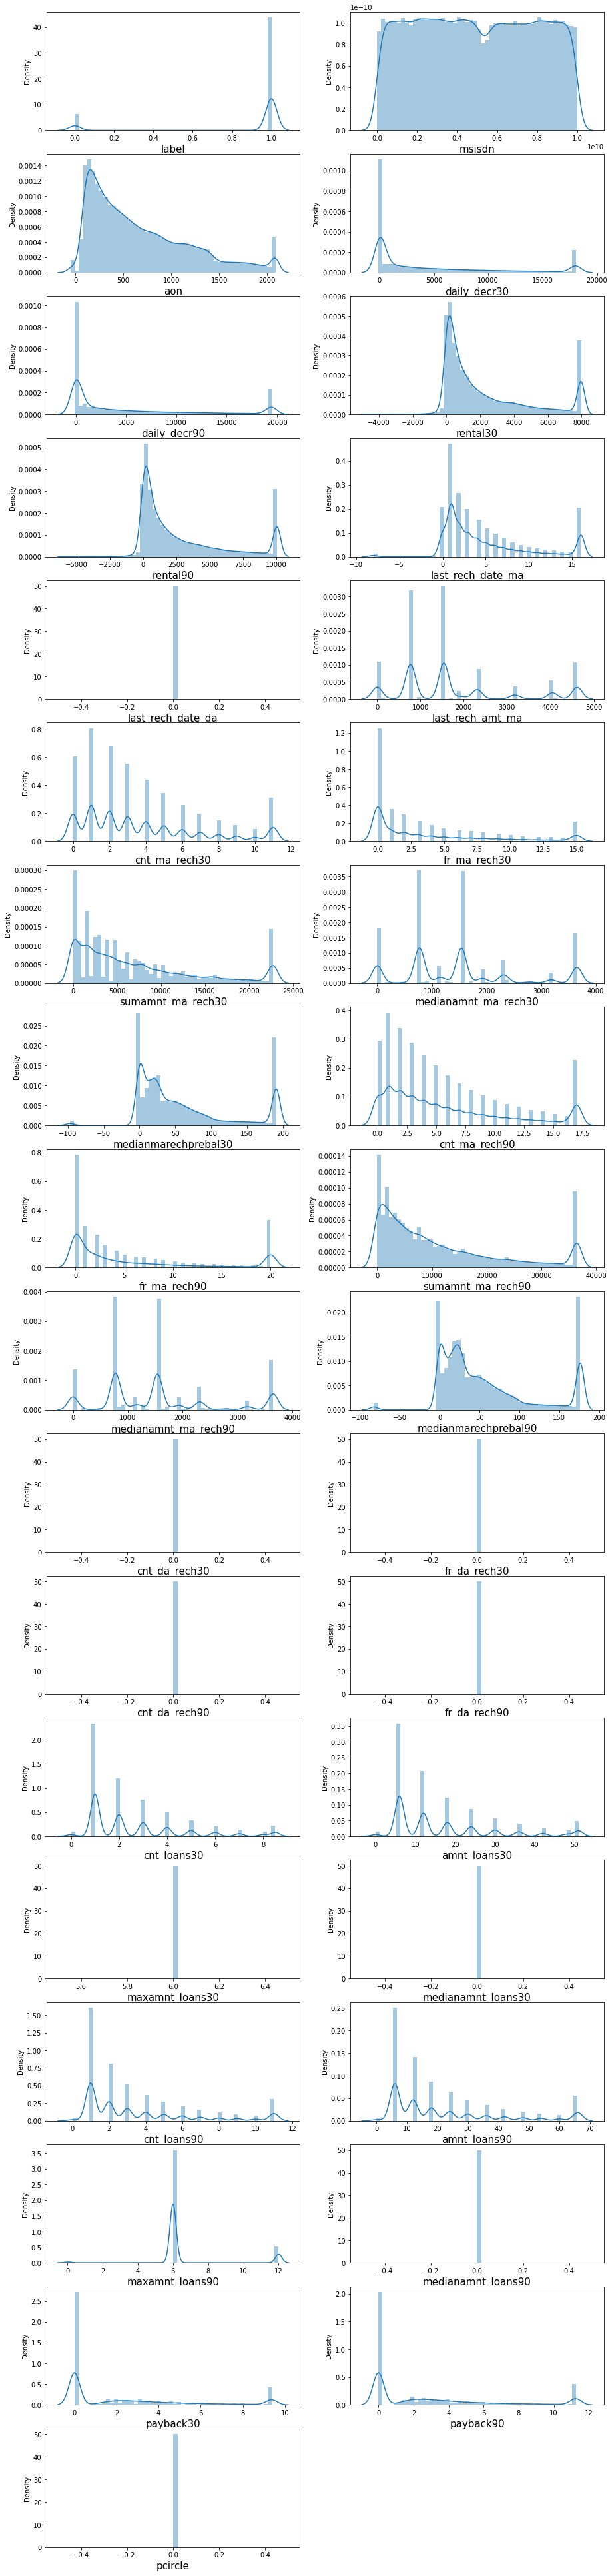

In [90]:
plt.figure(figsize=(15,70))
graph=1
for column in df:
    if graph<=37:
        ax=plt.subplot(18,2,graph)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=15)
    graph+=1
plt.show()

In [91]:
df['label'].value_counts()

1    183431
0     26162
Name: label, dtype: int64

In [92]:
non_defaulter=df[df.label==1]
defaulter=df[df.label==0]

In [93]:
defaulter=defaulter.sample(n=26162)

In [94]:
new_df=pd.concat([defaulter,non_defaulter],axis=0)

In [95]:
new_df

label      msisdn     aon  daily_decr30  daily_decr90  rental30  \
56548       0   332085320  1203.0      0.000000      0.000000    414.12   
76156       0  3244290849   798.0      1.800000      1.800000    446.04   
137654      0  8240889238   159.0   3790.725000   3790.841667    798.44   
192774      0  7843295203   100.0      0.026667      0.026667      0.00   
43413       0  2314385350   375.0     58.857333     58.857333   1572.56   
...       ...         ...     ...           ...           ...       ...   
209588      1  2275885348   404.0    151.872333    151.872333   1089.19   
209589      1  9558384455  1075.0     36.936000     36.936000   1728.36   
209590      1  2855685350  1013.0  11843.111667  11904.350000   5861.83   
209591      1  5971282733  1732.0  12488.228333  12574.370000    411.83   
209592      1  6506185339  1581.0   4489.362000   4534.820000    483.92   

        rental90  last_rech_date_ma  last_rech_date_da  last_rech_amt_ma  \
56548     414.12                0.0                0.0               0.0   
76156     446.04                0.0                0.0               0.0   
137654   1395.40                3.0                0.0            1539.0   
192774      0.00                3.0                0.0             773.0   
43413    1572.56               14.0                0.0            3178.0   
...          ...                ...                ...               ...   
209588   1089.19                1.0                0.0            4048.0   
209589   1728.36                4.0                0.0             773.0   
209590   8893.20                3.0                0.0            1539.0   
209591    984.58                2.0                0.0             773.0   
209592    631.20               13.0                0.0            4617.5   

        cnt_ma_rech30  fr_ma_rech30  sumamnt_ma_rech30  medianamnt_ma_rech30  \
56548             0.0           0.0                0.0                   0.0   
76156             0.0           0.0                0.0                   0.0   
137654            2.0          15.0             5587.0                2793.5   
192774            1.0          15.0              773.0                 773.0   
43413             4.0           7.0             9442.0                2362.5   
...               ...           ...                ...                   ...   
209588            3.0           2.0            10404.0                3178.0   
209589            4.0           1.0             3092.0                 773.0   
209590            5.0           8.0             9334.0                1539.0   
209591            5.0           4.0            12154.0                 773.0   
209592            2.0           1.0             9065.0                3655.0   

        medianmarechprebal30  cnt_ma_rech90  fr_ma_rech90  sumamnt_ma_rech90  \
56548                   0.00            0.0           0.0                0.0   
76156                   0.00            0.0           0.0                0.0   
137654                 22.00            2.0          17.0             5587.0   
192774                 10.00            1.0           0.0              773.0   
43413                 175.00            6.0           0.0            10388.0   
...                      ...            ...           ...                ...   
209588                 91.81            3.0           2.0            10404.0   
209589                161.30            6.0           2.0             4038.0   
209590                 51.13           11.0           5.0            18592.0   
209591                164.00            6.0           4.0            17941.0   
209592                191.00            3.0          19.0            16591.0   

        medianamnt_ma_rech90  medianmarechprebal90  cnt_da_rech30  \
56548                    0.0                 0.000            0.0   
76156                    0.0                 0.000            0.0   
137654                2793.5                22.000            0.0

In [96]:
new_df['rental30'].min()

-4334.36

In [97]:
new_df['rental30'].max()

7971.719999999999

In [98]:
new_df['rental30'].mean()

2197.069184277084

In [99]:
new_df['rental30'].sum()

460490321.53999996

In [100]:
new_df["fr_ma_rech30"].unique()

array([ 0., 15.,  7., 10.,  4.,  1.,  5.,  8.,  6.,  2.,  3.,  9., 12.,
       13., 14., 11.])

In [101]:
new_df["fr_ma_rech30"].skew()

1.253282147454248

In [102]:
df1=[new_df]
for column in df1:
    column.loc[column["fr_ma_rech30"] <=0,  'frequency_group'] = 'no frequency'
    column.loc[(column['fr_ma_rech30'] > 0) & (column['fr_ma_rech30'] <=1 ), 'frequency_group'] = 'low frequency'
    column.loc[(column['fr_ma_rech30'] >1) & (column['fr_ma_rech30'] <=2), 'frequency_group'] = 'medium frequency'
    column.loc[(column['fr_ma_rech30'] >2), 'frequency_group'] = 'high frequency'

In [103]:
frequency_data=pd.crosstab(new_df['label'],new_df['frequency_group']).apply(lambda x: x/x.sum() * 100)
frequency_data=frequency_data.transpose()

In [104]:
frequency_data

label                     0          1
frequency_group                       
high frequency     5.481040  94.518960
low frequency      4.304873  95.695127
medium frequency   3.787999  96.212001
no frequency      24.870684  75.129316

In [105]:
freq=pd.DataFrame(new_df['frequency_group'].value_counts())
freq

frequency_group
high frequency              89691
no frequency                78683
low frequency               22370
medium frequency            18849

In [106]:
freq['% Subscription'] =frequency_data[1]
freq['% Subscription']

high frequency      94.518960
no frequency        75.129316
low frequency       95.695127
medium frequency    96.212001
Name: % Subscription, dtype: float64

In [107]:
freq.drop('frequency_group',axis = 1,inplace = True)

In [108]:
freq['fre'] =[1,2,0,3]
freq

% Subscription  fre
high frequency         94.518960    1
no frequency           75.129316    2
low frequency          95.695127    0
medium frequency       96.212001    3

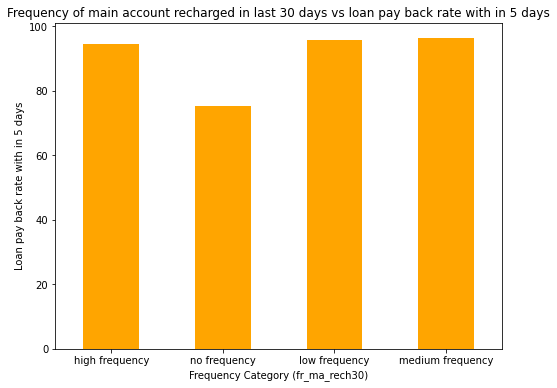

In [109]:
plot_freq = freq['% Subscription'].plot(kind = 'bar',color =('orange'),figsize = (8,6))
plt.title('Frequency of main account recharged in last 30 days vs loan pay back rate with in 5 days')
plt.ylabel('Loan pay back rate with in 5 days')
plt.xlabel('Frequency Category (fr_ma_rech30)')
plt.xticks(rotation = 'horizontal')
plt.show()
# label the bar
for rec, label in zip(plot_freq.patches,
                      freq['% Subscription'].round(1).astype(str)):
    plot_freq.text(rec.get_x() + rec.get_width()/2, 
                      rec.get_height() + 1, 
                      label+'%',  
                      ha = 'center', 
                      color = 'black')

In [110]:
df1=[new_df]
for column in df1:
    column.loc[column["cnt_loans30"] <=0,  'loan_frequency_group'] = 'no loans'
    column.loc[(column['cnt_loans30'] > 0) & (column['cnt_loans30'] <=1 ), 'loan_frequency_group'] = 'low num of loans'
    column.loc[(column['cnt_loans30'] >1) & (column['cnt_loans30'] <=4), 'loan_frequency_group'] = 'medium num of loans'
    column.loc[(column['cnt_loans30'] >4), 'loan_frequency_group'] = 'high num of loans'

In [111]:
numbr_loan=pd.crosstab(new_df['label'],new_df['loan_frequency_group']).apply(lambda x: x/x.sum() * 100)
numbr_loan=numbr_loan.transpose()

In [112]:
freq= pd.DataFrame(new_df['loan_frequency_group'].value_counts())
#bal['% Contacted'] = bal['balance_group']*100/bal['balance_group'].sum()
freq['% Subscription'] =numbr_loan[1]
freq.drop('loan_frequency_group',axis = 1,inplace = True)

freq['fre'] = [1,2,0,3]
freq=freq.sort_values('fre',ascending = True)

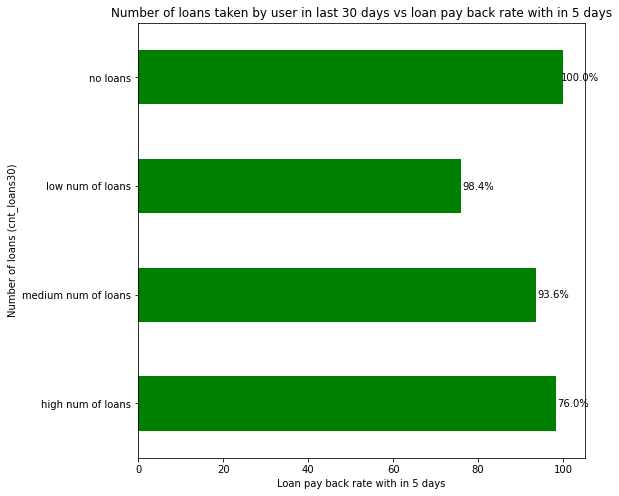

In [113]:
plot_freq=freq['% Subscription'].plot(kind ='barh',color = ('green'), figsize = (8,8))

plt.title('Number of loans taken by user in last 30 days vs loan pay back rate with in 5 days')
plt.ylabel('Number of loans (cnt_loans30)')
plt.xlabel('Loan pay back rate with in 5 days')
plt.xticks(rotation = 'horizontal')
# label the bar
for rec, label in zip(plot_freq.patches,
                      freq['% Subscription'].round(1).sort_values(ascending = True).round(1).astype(str)):
    plot_freq.text(rec.get_width()+4,
                   
    rec.get_y()+ rec.get_height()-0.3, 
    label+'%', 
    ha = 'center', 
    va='bottom')

In [114]:
df1=[new_df]
for column in df1:
    column.loc[column["amnt_loans30"] <=0,  'loanamnt_frequency_group'] = 'no loans'
    column.loc[(column['amnt_loans30'] > 0) & (column['amnt_loans30'] <=6 ), 'loanamnt_frequency_group'] = 'low amnt of loans'
    column.loc[(column['amnt_loans30'] >6) & (column['amnt_loans30'] <=24), 'loanamnt_frequency_group'] = 'medium amnt of loans'
    column.loc[(column['amnt_loans30'] >24), 'loanamnt_frequency_group'] = 'high amnt of loans'

In [115]:
loan_amt=pd.crosstab(new_df['label'],new_df['loanamnt_frequency_group']).apply(lambda x: x/x.sum() * 100)
loan_amt=loan_amt.transpose()

In [116]:
fre1 = pd.DataFrame(new_df['loanamnt_frequency_group'].value_counts())
#bal['% Contacted'] = bal['balance_group']*100/bal['balance_group'].sum()
fre1['% Subscription'] =loan_amt[1]
fre1.drop('loanamnt_frequency_group',axis = 1,inplace = True)

fre1['fre1'] = [1,2,0,3]
fre1= fre1.sort_values('fre1',ascending = True)

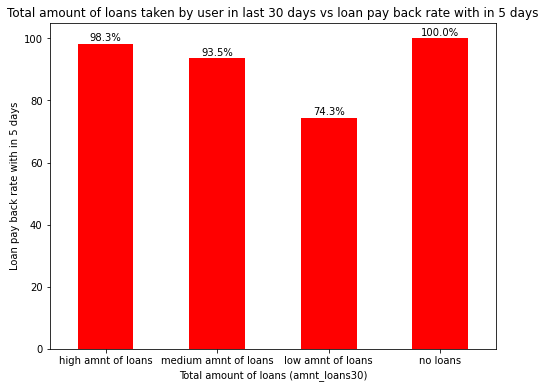

In [117]:
plot_fre1 = fre1['% Subscription'].plot(kind = 'bar',
                                               color = ('red'), figsize = (8,6))

plt.title('Total amount of loans taken by user in last 30 days vs loan pay back rate with in 5 days')
plt.ylabel('Loan pay back rate with in 5 days')
plt.xlabel('Total amount of loans (amnt_loans30)')
plt.xticks(rotation = 'horizontal')

# label the bar
for rec, label in zip(plot_fre1.patches,
                      fre1['% Subscription'].round(1).astype(str)):
    plot_fre1.text(rec.get_x() + rec.get_width()/2, 
                      rec.get_height() + 1, 
                      label+'%',  
                      ha = 'center', 
                      color = 'black')

In [118]:
x=df.drop(columns=['label'],axis=1)
y=df['label']

In [119]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(x,y)

ExtraTreesClassifier()

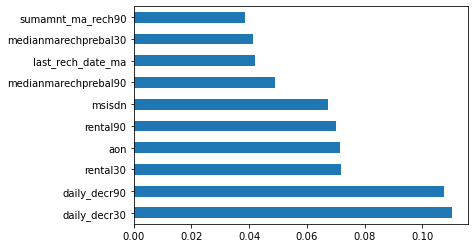

In [120]:
feat_importances =pd.Series(model.feature_importances_, index=x.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

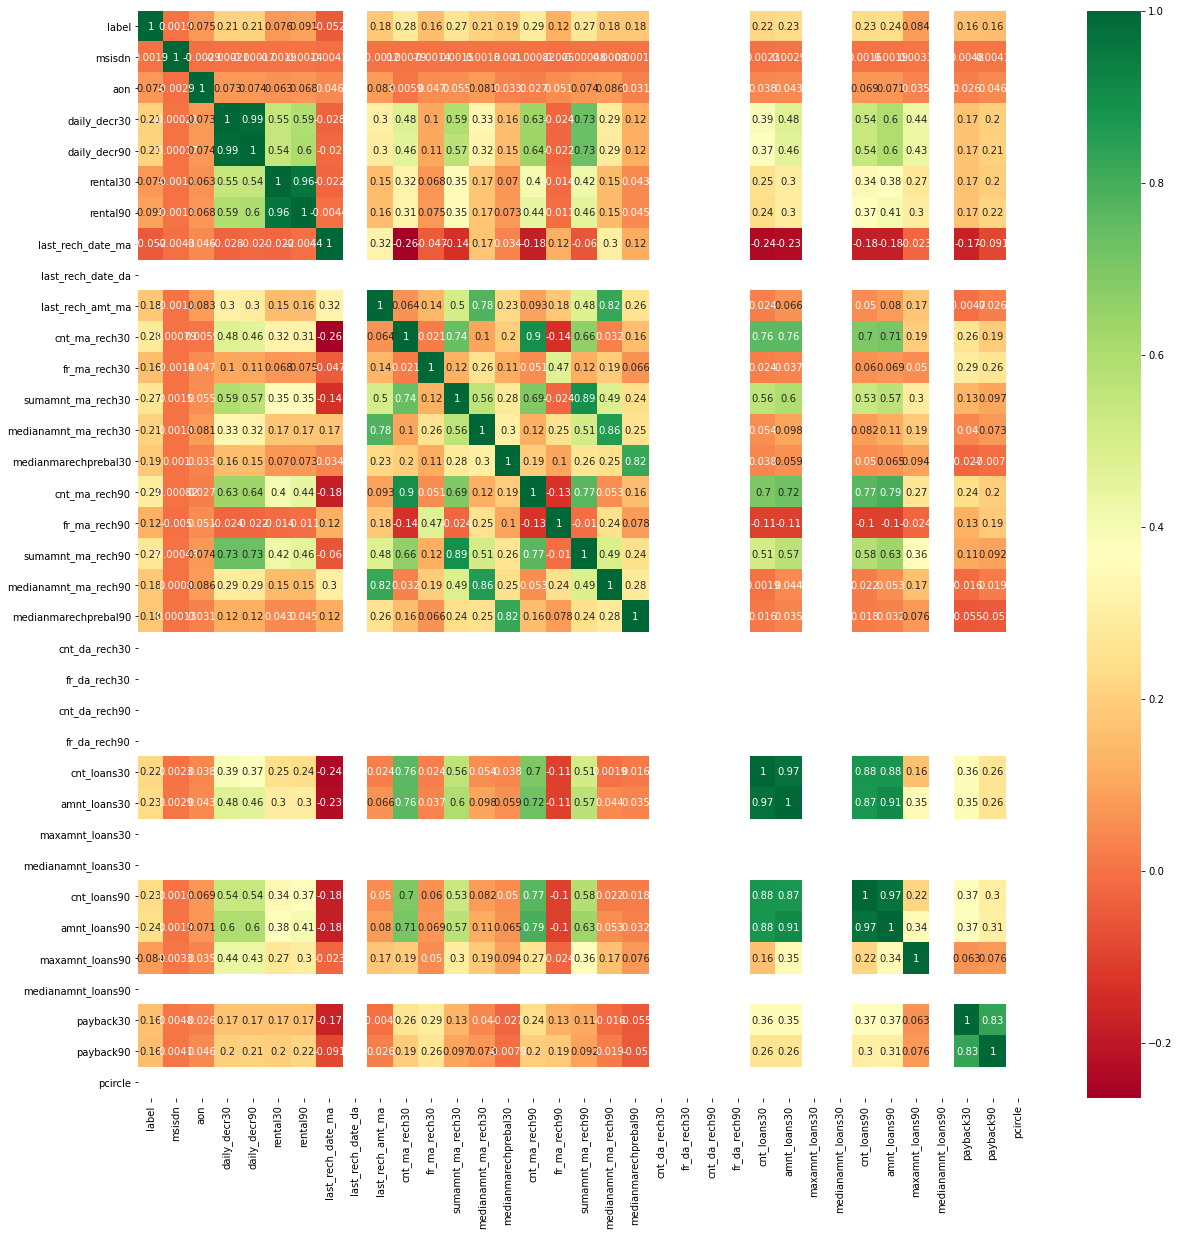

In [121]:
corrmat =df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [122]:
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV

In [123]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=10)

In [124]:
from sklearn.linear_model import LogisticRegression

In [125]:
lr=LogisticRegression()

In [126]:
lr.fit(x_train,y_train)

LogisticRegression()

In [127]:
lr_pred=lr.predict(x_test)

In [128]:
from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve,roc_auc_score

In [129]:
accuracy=accuracy_score(y_test,lr_pred)
accuracy

0.8757275994783549

In [130]:
lr_cross_score=cross_val_score(lr,x,y,cv=5,scoring='accuracy').mean()
lr_cross_score

0.8751771290811783

In [131]:
from sklearn.metrics import classification_report, confusion_matrix

In [132]:
from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve,roc_auc_score,classification_report,plot_roc_curve

In [133]:
print(confusion_matrix(y_test, lr_pred))

[[    0  7814]
 [    0 55064]]


In [134]:
print(classification_report(y_test, lr_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      7814
           1       0.88      1.00      0.93     55064

    accuracy                           0.88     62878
   macro avg       0.44      0.50      0.47     62878
weighted avg       0.77      0.88      0.82     62878



In [135]:
from sklearn.tree import DecisionTreeClassifier

In [136]:
dt=DecisionTreeClassifier()

In [137]:
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [138]:
dt_pred=dt.predict(x_test)

In [139]:
accuracy=accuracy_score(y_test,dt_pred)
accuracy

0.8620344158529215

In [140]:
dt_cross_score=cross_val_score(dt,x,y,cv=5,scoring='accuracy').mean()
dt_cross_score

0.8638742759866573

In [141]:
print(confusion_matrix(y_test,dt_pred))

[[ 3830  3984]
 [ 4691 50373]]


In [142]:
print(classification_report(y_test, dt_pred))

              precision    recall  f1-score   support

           0       0.45      0.49      0.47      7814
           1       0.93      0.91      0.92     55064

    accuracy                           0.86     62878
   macro avg       0.69      0.70      0.69     62878
weighted avg       0.87      0.86      0.86     62878



In [143]:
from sklearn.ensemble import RandomForestClassifier

In [144]:
rf=RandomForestClassifier()

In [145]:
rf.fit(x_train,y_train)

RandomForestClassifier()

In [146]:
rf_pred=rf.predict(x_test)

In [147]:
accuracy=accuracy_score(y_test,rf_pred)
accuracy

0.9132446960781195

In [148]:
rf_cross_score=cross_val_score(rf,x,y,cv=5,scoring='accuracy').mean()
rf_cross_score

0.9122632931132998

In [149]:
print(confusion_matrix(y_test,rf_pred))

[[ 3426  4388]
 [ 1067 53997]]


In [150]:
print(classification_report(y_test, rf_pred))

              precision    recall  f1-score   support

           0       0.76      0.44      0.56      7814
           1       0.92      0.98      0.95     55064

    accuracy                           0.91     62878
   macro avg       0.84      0.71      0.75     62878
weighted avg       0.90      0.91      0.90     62878



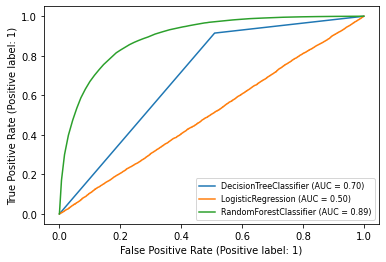

In [151]:
disp=plot_roc_curve(dt,x_test,y_test)
plot_roc_curve(lr,x_test,y_test,ax=disp.ax_)
plot_roc_curve(rf,x_test,y_test,ax=disp.ax_)
plt.legend(prop={'size':8},loc='lower right')
plt.show()

In [152]:
# using Hypertunning parameter
rf=RandomForestClassifier()

params={'n_estimators':[13,15],
        'criterion':['entropy'],
        'max_depth':[10,15],
        'min_samples_split':[10,11],
        'min_samples_leaf':[5,6]}
grd=GridSearchCV(rf,param_grid=params,cv=5,n_jobs=-1)
grd.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['entropy'], 'max_depth': [10, 15],
                         'min_samples_leaf': [5, 6],
                         'min_samples_split': [10, 11],
                         'n_estimators': [13, 15]})

In [153]:
best_parameters=grd.best_params_
print(best_parameters)

{'criterion': 'entropy', 'max_depth': 15, 'min_samples_leaf': 5, 'min_samples_split': 10, 'n_estimators': 15}


In [154]:
grd.best_score_

0.9108475615990186

### 